In [1]:
# to import necessary libraries

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# to load csv file to sps dataframe and check cols dtype

sps = pd.read_csv(os.path.abspath('data\Software Professionals Salaries.csv'))
sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [ ]:
# to check unique null value

sps[sps['Company Name'].isna()]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
13760,4.0,NaN,Software Development Engineer,1188000,1,Bangalore,Full Time,SDE


In [4]:
# to check its shape

print(f'sps rows: {sps.shape[0]}\nsps cols: {sps.shape[1]}')

sps rows: 22770
sps cols: 8


In [5]:
# how many unique Job Roles in the dataset

print(f"Total unique 'Job Roles': {sps['Job Roles'].nunique()}")
print(f"Job Roles:\n{sps['Job Roles'].unique()}")

Total unique 'Job Roles': 11
Job Roles:
['Android' 'Backend' 'Database' 'Frontend' 'IOS' 'Java' 'Mobile' 'SDE'
 'Python' 'Web' 'Testing']


In [6]:
# how many unique Job Title for Python Job Role

sps.loc[sps['Job Roles'] == 'Python']['Job Title'].nunique()

102

In [7]:
# total Company Name with Python Job Role and Job Title containing substring Analyst

sps.loc[(sps['Job Roles'] == 'Python') & (sps['Job Title'].str.contains('Analyst', regex=False))]['Company Name'].nunique()

3

In [8]:
# Company Name with highest number of Salaries Reported

sps.groupby('Company Name', as_index=False)['Salaries Reported'].sum().sort_values('Salaries Reported', ascending=False).head(1)


,Company Name,Salaries Reported
660,Amazon,2636


In [9]:
# how many Locations is this company present in?

sps.loc[sps['Company Name'] == 'Amazon']['Location'].nunique()

9

Next code is made using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) of the ExchangeRate-API service

In [10]:
# to convert Salary from Indian Rupees to EUR (rounded to zero decimals) in new column Salary EUR

url = 'https://open.er-api.com/v6/latest/INR'
exc_rate = requests.get(url)
print(f'Loading request ExchangeRate | status code: {exc_rate.status_code}')

rate = exc_rate.json()['rates']['EUR']
print(f'Conversion rate EUR-INR at this time: {rate}')

sps['Salary EUR'] = round(sps['Salary'] * rate).astype('int64')
sps.sample(5)

Loading request ExchangeRate | status code: 200
Conversion rate EUR-INR at this time: 0.011084


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary EUR
17248,4.2,Skilrock Technologies,Software Development Engineer,228000,1,New Delhi,Full Time,SDE,2527
4872,2.1,Jupiter Infoway,Oracle Database Developer,600000,1,Bangalore,Full Time,Database,6650
7304,3.5,Royal,IOS Developer,264000,1,Bangalore,Full Time,IOS,2926
17425,4.0,Software development Engineer,Software Development Engineer,800000,1,New Delhi,Full Time,SDE,8867
11967,4.0,Ericsson-Worldwide,Software Development Engineer,1000000,2,Bangalore,Full Time,SDE,11084


In [11]:
# Salary EUR on average for Python Job Role

avg_salary = round(sps.loc[sps['Job Roles'] == 'Python']['Salary EUR'].mean(), 2)
print(f'Salary EUR on average: {avg_salary}')

Salary EUR on average: 5387.03


In [12]:
# Company Name with the highest average Salary EUR across all Job Titles

cmp = sps.groupby('Company Name', as_index=False)['Salary EUR'].mean().sort_values('Salary EUR', ascending=False).head(1)
print(f"{cmp['Company Name'].item()} | Salary EUR on average: {'{:,}'.format(cmp['Salary EUR'].item())}")


Thapar University | Salary EUR on average: 997,560.0


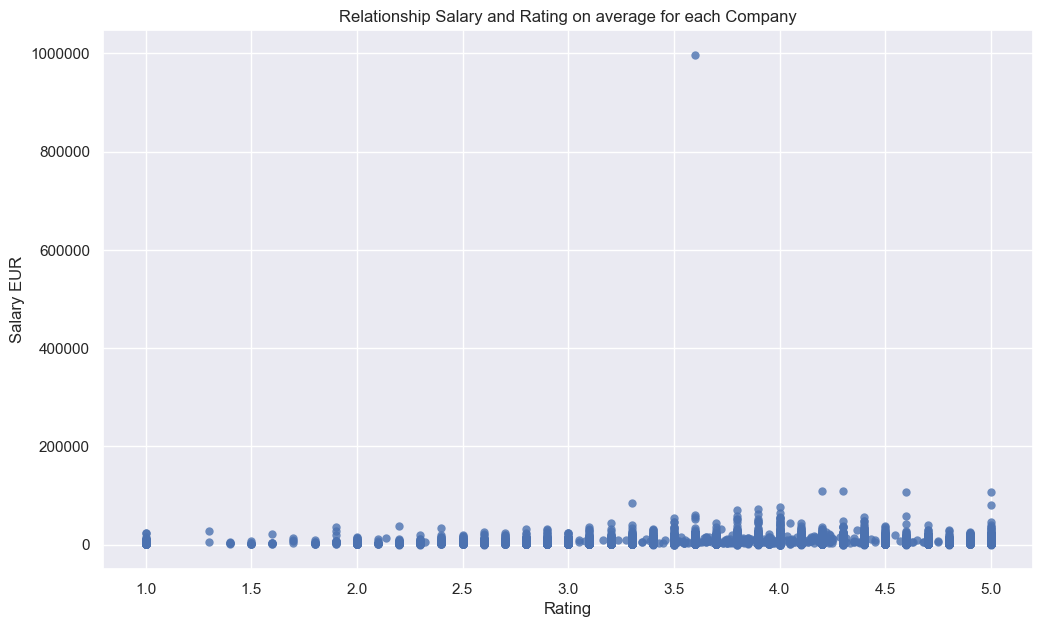


      The anomaly in the plot is Thapar University.
      Its average salary is not very plausible compared to that of other companies. 
      Especially when compared to a not so high average rating score.
       


In [13]:
# to plot the relationship between the average Salary EUR and the average Rating for each Company

# to create df with necessary values

sps_group = sps.groupby('Company Name', as_index=False)[['Rating', 'Salary EUR']].mean()

# scatterplot

sns.set_theme(rc={'figure.figsize':(12, 7)})
plot = sns.scatterplot(x='Rating', y='Salary EUR', data=sps_group, linewidth=0, alpha=0.8)
plot.set(title='Relationship Salary and Rating on average for each Company')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# which Company is causing that oddity?

oddity = sps_group.loc[sps_group['Salary EUR'] > 9e5]['Company Name'].item()
print(f'''
      The anomaly in the plot is {oddity}.
      Its average salary is not very plausible compared to that of other companies. 
      Especially when compared to a not so high average rating score.
       ''')